In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=12bf309e73837bf0f22eeb9d4998e7ec


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 13 | huilong
Processing Record 2 of Set 13 | thompson
Processing Record 3 of Set 13 | faya
Processing Record 4 of Set 13 | terrace bay
Processing Record 5 of Set 13 | mount gambier
Processing Record 6 of Set 13 | ushuaia
Processing Record 7 of Set 13 | santona
Processing Record 8 of Set 13 | kloulklubed
Processing Record 9 of Set 13 | lebu
Processing Record 10 of Set 13 | mataura
Processing Record 11 of Set 13 | wulanhaote
City not found. Skipping...
Processing Record 12 of Set 13 | warqla
City not found. Skipping...
Processing Record 13 of Set 13 | matagami
Processing Record 14 of Set 13 | butaritari
Processing Record 15 of Set 13 | najran
Processing Record 16 of Set 13 | champerico
Processing Record 17 of Set 13 | port keats
Processing Record 18 of Set 13 | tommot
Processing Record 19 of Set 13 | kardailovo
Processing Record 20 of Set 13 | fort nelson
Processing Record 21 of Set 13 | bethel
Processing Record 22 of Set 13 | shiyan
Processing Record 23 of Set

Processing Record 31 of Set 16 | mpanda
Processing Record 32 of Set 16 | chuy
Processing Record 33 of Set 16 | mallama
City not found. Skipping...
Processing Record 34 of Set 16 | kahului
Processing Record 35 of Set 16 | zyryanovsk
Processing Record 36 of Set 16 | port macquarie
Processing Record 37 of Set 16 | kahramanmaras
Processing Record 38 of Set 16 | turukhansk
Processing Record 39 of Set 16 | atikokan
Processing Record 40 of Set 16 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 16 | hobyo
Processing Record 42 of Set 16 | cadiz
Processing Record 43 of Set 16 | iqaluit
Processing Record 44 of Set 16 | maun
Processing Record 45 of Set 16 | pisco
Processing Record 46 of Set 16 | chagda
City not found. Skipping...
Processing Record 47 of Set 16 | kupang
Processing Record 48 of Set 16 | ngama
Processing Record 49 of Set 16 | constitucion
Processing Record 50 of Set 16 | ponta do sol
Processing Record 1 of Set 17 | rjukan
Processing Record 2 of Set 17 | ust-kuyga
P

Processing Record 15 of Set 20 | ko samui
Processing Record 16 of Set 20 | iquique
Processing Record 17 of Set 20 | faanui
Processing Record 18 of Set 20 | nova olinda do norte
Processing Record 19 of Set 20 | ilulissat
Processing Record 20 of Set 20 | high level
Processing Record 21 of Set 20 | ozernovskiy
Processing Record 22 of Set 20 | tasiilaq
Processing Record 23 of Set 20 | severobaykalsk
Processing Record 24 of Set 20 | zhanatas
City not found. Skipping...
Processing Record 25 of Set 20 | miramar
Processing Record 26 of Set 20 | mezen
Processing Record 27 of Set 20 | tumannyy
City not found. Skipping...
Processing Record 28 of Set 20 | jiaohe
Processing Record 29 of Set 20 | karaul
City not found. Skipping...
Processing Record 30 of Set 20 | aripuana
Processing Record 31 of Set 20 | kyshtovka
Processing Record 32 of Set 20 | wattegama
Processing Record 33 of Set 20 | draguignan
Processing Record 34 of Set 20 | mitsamiouli
Processing Record 35 of Set 20 | maltahohe
Processing Re

Processing Record 2 of Set 24 | bowen
Processing Record 3 of Set 24 | margate
Processing Record 4 of Set 24 | athieme
City not found. Skipping...
Processing Record 5 of Set 24 | loiza
Processing Record 6 of Set 24 | muravlenko
Processing Record 7 of Set 24 | muros
Processing Record 8 of Set 24 | tateyama
Processing Record 9 of Set 24 | lata
Processing Record 10 of Set 24 | luorong
Processing Record 11 of Set 24 | marsh harbour
Processing Record 12 of Set 24 | jacareacanga
Processing Record 13 of Set 24 | mecca
Processing Record 14 of Set 24 | tocantinopolis
City not found. Skipping...
Processing Record 15 of Set 24 | kosh-agach
Processing Record 16 of Set 24 | wanning
Processing Record 17 of Set 24 | kununurra
Processing Record 18 of Set 24 | prachuap khiri khan
Processing Record 19 of Set 24 | kastamonu
Processing Record 20 of Set 24 | broome
Processing Record 21 of Set 24 | flinders
Processing Record 22 of Set 24 | kudymkar
Processing Record 23 of Set 24 | astana
Processing Record 24

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huilong,31.8111,121.6550,80.98,93,71,7.16,CN,2021-07-29 19:11:25
1,Thompson,55.7435,-97.8558,74.77,33,17,7.18,CA,2021-07-29 19:10:27
2,Faya,18.3851,42.4509,64.92,68,40,4.38,SA,2021-07-29 19:10:48
3,Terrace Bay,48.7834,-87.1000,64.76,49,49,12.86,CA,2021-07-29 19:11:25
4,Mount Gambier,-37.8333,140.7667,50.95,53,100,15.46,AU,2021-07-29 19:11:25
5,Ushuaia,-54.8000,-68.3000,47.86,37,20,20.71,AR,2021-07-29 19:09:15
6,Santona,43.4439,-3.4576,70.11,81,56,2.71,ES,2021-07-29 19:11:25
7,Kloulklubed,7.0419,134.2556,77.50,74,100,4.97,PW,2021-07-29 19:11:26
8,Lebu,-37.6167,-73.6500,56.05,61,0,4.23,CL,2021-07-29 19:09:39
9,Mataura,-46.1927,168.8643,40.48,94,87,3.89,NZ,2021-07-29 19:09:10


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

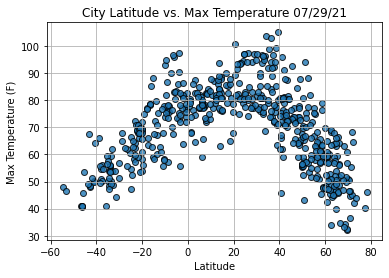

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

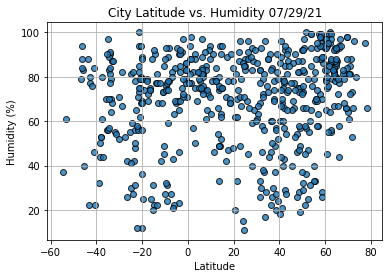

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

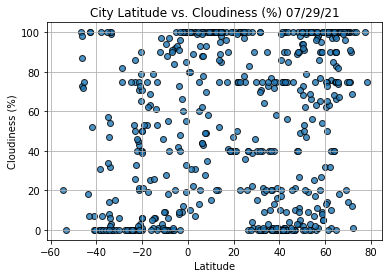

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

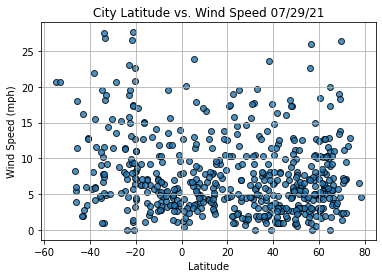

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [54]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                   Champerico
Lat                          14.3
Lng                      -91.9167
Max Temp                    88.75
Humidity                       63
Cloudiness                     85
Wind Speed                   3.42
Country                        GT
Date          2021-07-29 19:11:26
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
548     True
549    False
550     True
551     True
552    False
Name: Lat, Length: 553, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huilong,31.8111,121.6550,80.98,93,71,7.16,CN,2021-07-29 19:11:25
1,Thompson,55.7435,-97.8558,74.77,33,17,7.18,CA,2021-07-29 19:10:27
2,Faya,18.3851,42.4509,64.92,68,40,4.38,SA,2021-07-29 19:10:48
3,Terrace Bay,48.7834,-87.1000,64.76,49,49,12.86,CA,2021-07-29 19:11:25
6,Santona,43.4439,-3.4576,70.11,81,56,2.71,ES,2021-07-29 19:11:25


In [33]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

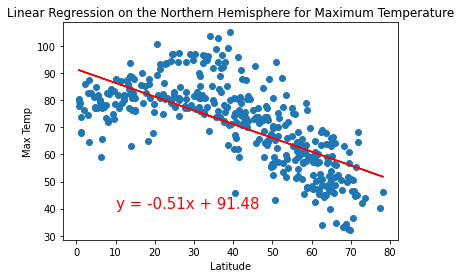

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

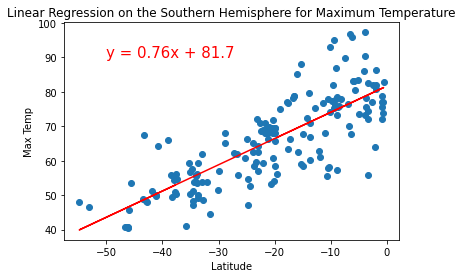

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

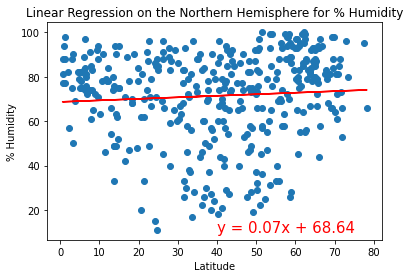

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

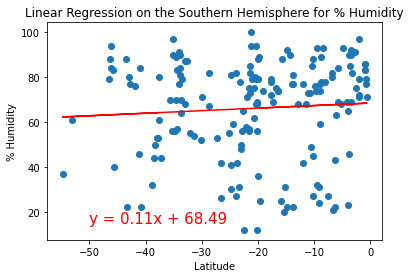

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

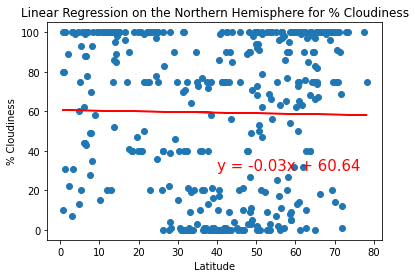

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))

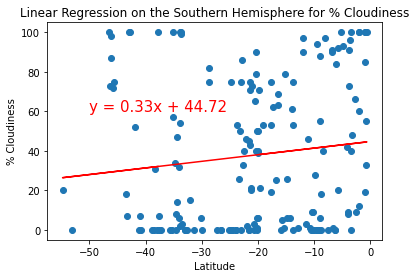

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

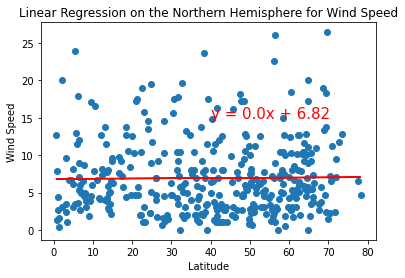

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

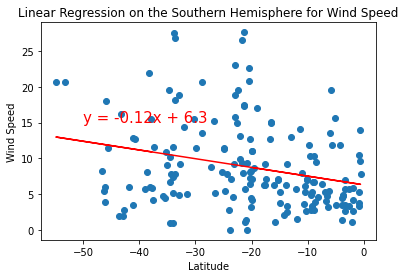

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,15))